In [80]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

df = pd.read_csv ("2023 QS.csv")
df.head()


,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6


In [81]:
df.dtypes

Rank               int64
institution       object
location code     object
location          object
ar score         float64
ar rank           object
er score         float64
er rank           object
fsr score        float64
fsr rank          object
cpf score        float64
cpf rank          object
ifr score        float64
ifr rank          object
isr score        float64
isr rank          object
irn score        float64
irn rank          object
ger score        float64
ger rank          object
score scaled      object
dtype: object

In [82]:
column_names = df.columns
print(column_names)

Index(['Rank', 'institution', 'location code', 'location', 'ar score',
       'ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score',
       'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank',
       'irn score', 'irn rank', 'ger score', 'ger rank', 'score scaled'],
      dtype='object')


In [83]:
column_names = df.columns
print(column_names)


#Las columnas que pertenecen a ranks y esta universidad cuente con un posicion mayor a 601 aparece como 601+
#Por lo cual reemplacaremos estos por un valor outlier

df['ar rank'] = df["ar rank"].replace(["501+"],[10000] )
df['er rank'] = df["er rank"].replace(["501+"],[10000] )
df['fsr rank'] = df["fsr rank"].replace(["501+"],[10000] )
df['cpf rank'] = df["cpf rank"].replace(["501+"],[10000] )
df['ifr rank'] = df["ifr rank"].replace(["501+"],[10000] )
df['isr rank'] = df["isr rank"].replace(["501+"],[10000] )
df['irn rank'] = df["irn rank"].replace(["501+"],[10000] )
df['ger rank'] = df["ger rank"].replace(["501+"],[10000] )

df['ar rank'] = df["ar rank"].replace(["601+"],[10000] )
df['er rank'] = df["er rank"].replace(["601+"],[10000] )
df['fsr rank'] = df["fsr rank"].replace(["601+"],[10000] )
df['cpf rank'] = df["cpf rank"].replace(["601+"],[10000] )
df['ifr rank'] = df["ifr rank"].replace(["601+"],[10000] )
df['isr rank'] = df["isr rank"].replace(["601+"],[10000] )
df['irn rank'] = df["irn rank"].replace(["601+"],[10000] )
df['ger rank'] = df["ger rank"].replace(["601+"],[10000] )

columnas_a_rellenar1 = ['ar rank', 'er rank', 'fsr rank', 'cpf rank', 'ifr rank', 'isr rank', 'irn rank', 'ger rank']


columnas_a_rellenar2 = ['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score',  'ger score']


#Estos se rellenan con valores atipicos fuera del rango, en este caso colocandose 1000000 a los ranks que originalmente son NaN
df[columnas_a_rellenar1] = df[columnas_a_rellenar1].fillna("1000000")
#Estos se rellenan con valores atipicos fuera del rango, en este caso colocandose 0 a los score que originalmente son NaN

df[columnas_a_rellenar2] = df[columnas_a_rellenar2].fillna("0")

df['ar rank'] = df['ar rank'].astype(int)
df['er rank'] = df['er rank'].astype(int)
df['fsr rank'] = df['fsr rank'].astype(int)
df['cpf rank'] = df['cpf rank'].astype(int)
df['ifr rank'] = df['ifr rank'].astype(int)
df['isr rank'] = df['isr rank'].astype(int)
df['irn rank'] = df['irn rank'].astype(int)
df['ger rank'] = df['ger rank'].astype(int)

df['ar score'] = df['ar score'].astype(float)
df['er score'] = df['er score'].astype(float)
df['fsr score'] = df['fsr score'].astype(float)
df['cpf score'] = df['cpf score'].astype(float)
df['ifr score'] = df['ifr score'].astype(float)
df['isr score'] = df['isr score'].astype(float)
df['irn score'] = df['irn score'].astype(float)
df['ger score'] = df['ger score'].astype(float)


Index(['Rank', 'institution', 'location code', 'location', 'ar score',
       'ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score',
       'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank',
       'irn score', 'irn rank', 'ger score', 'ger rank', 'score scaled'],
      dtype='object')


In [84]:
#Vamos a tratar de eliminar un inconveniente con el dato df['score scaled'] = df['score scaled'].astype(float) ya que, este dato oriinalmente
#Se trata de un sting con elements - que seran reemplados y el dominio del resto de datos es de  24.2 a 100, estos se reemplazaran con 0

df['score scaled'] = df["score scaled"].replace(["-"],[0] )
df['score scaled'] = df['score scaled'].astype(float)

In [85]:
df.isnull().sum()

Rank             0
institution      0
location code    0
location         0
ar score         0
ar rank          0
er score         0
er rank          0
fsr score        0
fsr rank         0
cpf score        0
cpf rank         0
ifr score        0
ifr rank         0
isr score        0
isr rank         0
irn score        0
irn rank         0
ger score        0
ger rank         0
score scaled     0
dtype: int64

In [86]:
df.dtypes

Rank               int64
institution       object
location code     object
location          object
ar score         float64
ar rank            int64
er score         float64
er rank            int64
fsr score        float64
fsr rank           int64
cpf score        float64
cpf rank           int64
ifr score        float64
ifr rank           int64
isr score        float64
isr rank           int64
irn score        float64
irn rank           int64
ger score        float64
ger rank           int64
score scaled     float64
dtype: object

<ipython-input-87-1e5c373772e8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


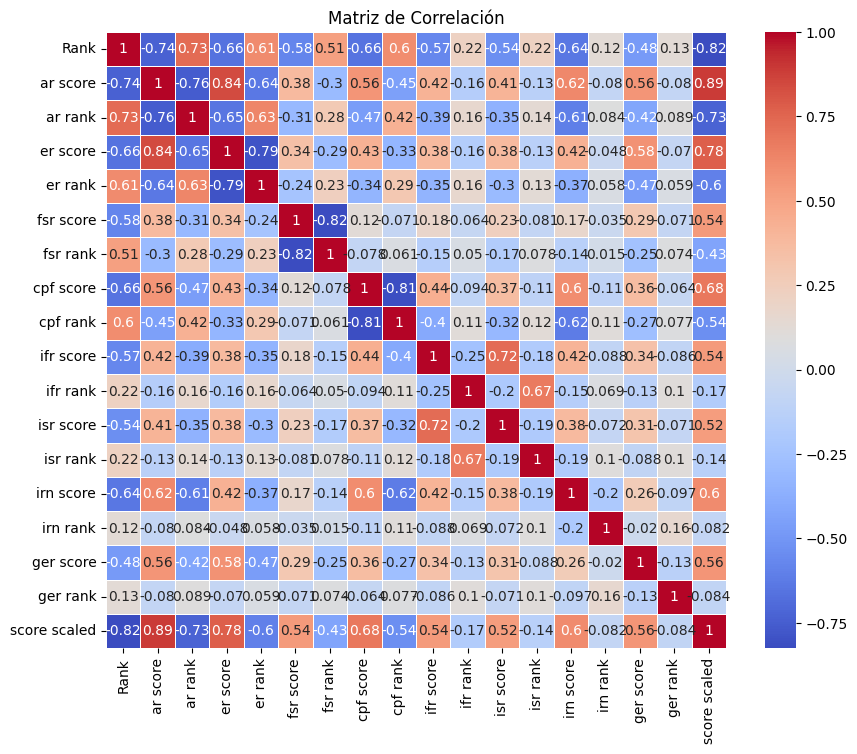

In [87]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Visualiza la  matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

In [89]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=17)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")



No. of training examples: 1137
No. of testing examples: 285


In [90]:


x_train=train.drop('Rank',axis=1)
y_train=train[['Rank']]

x_test=test.drop('Rank',axis=1)
y_test=test[['Rank']]

x_train.shape, y_train.shape, x_test.shape, y_test.shape



((1137, 20), (1137, 1), (285, 20), (285, 1))

In [79]:
# Separar la variable objetivo 'Rank'
y = df['Rank']

# Seleccionar todas las columnas excepto 'Rank' como características
X = df[['ar score','ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score', 'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank', 'irn score', 'irn rank', 'ger score', 'ger rank', 'score scaled']]


In [78]:
##
## Pruebas con validacion cruzada KFolds
##


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# Supongamos que tienes tus datos en X (características) y y (objetivo)

# Definir el número de pliegues (folds)
num_folds = 4

# Inicializar el validador cruzado (cross-validator) KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Inicializar una lista para almacenar las puntuaciones de validación
scores = []

# Iterar a través de los pliegues
for train_index, test_index in kf.split(X):
    # Dividir los datos en conjuntos de entrenamiento y prueba para este pliegue
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear y entrenar el modelo de Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluar el modelo en el conjunto de prueba y guardar la puntuación
    score = rf_model.score(X_test, y_test)
    scores.append(score)

# Calcular el promedio de las puntuaciones de validación cruzada
mean_score = sum(scores) / num_folds

print("Puntuaciones de Validación Cruzada:", scores)
print("Puntuación Promedio de Validación Cruzada:", mean_score)

Puntuaciones de Validación Cruzada: [0.0, 0.0, 0.0, 0.0]
Puntuación Promedio de Validación Cruzada: 0.0
